# Customer_Segmentation_USML

In [1]:
#  Import the required Library for the Project.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

##  Data Collection and Analysis Part

In [3]:
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Find the how many number of rows and columns.
dataset.shape

#  There are 200 rows or 5 columns.

(200, 5)

In [5]:
#  Getting the features information.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
#  Check the missing or null value for each of the columns.
dataset.isnull().sum()
# The dataset does not contain the missing value/

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
# Choosing the annual Income column and the spending score column.
x = dataset.iloc[:,[3,4]].values
x.shape

(200, 2)

## Choosing the number of Clusters for the algorithm
WCSS -> Within Clusters Sum of Squares.

In [10]:
# Finding wcss value for different number of clusters.
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [11]:
#  Plot the elbow graph to find which cluster have minimum wcss
sns.set()

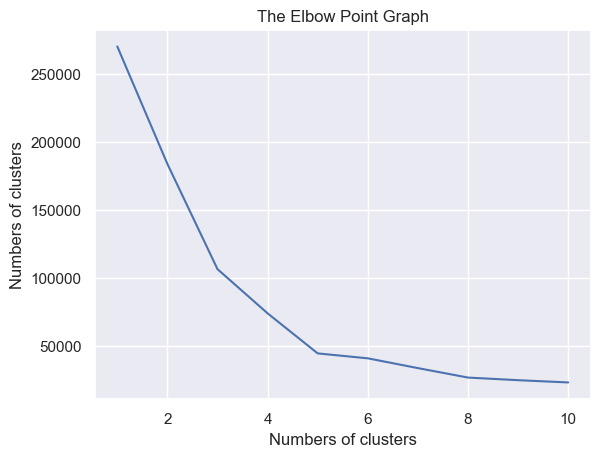

In [12]:
plt.plot(range(1,11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Numbers of clusters")
plt.ylabel("Numbers of clusters")
plt.show()

In [14]:
# x

Optimum Number of Clusters = 5

## Training the K=Means clustering model

In [16]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

#  return a label for each data point based on their clusters.
y = kmeans.fit_predict(x)
print(y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


### Visualizing all the clusters
 5 Clusters --> 0, 1 ,2 , 3, 4

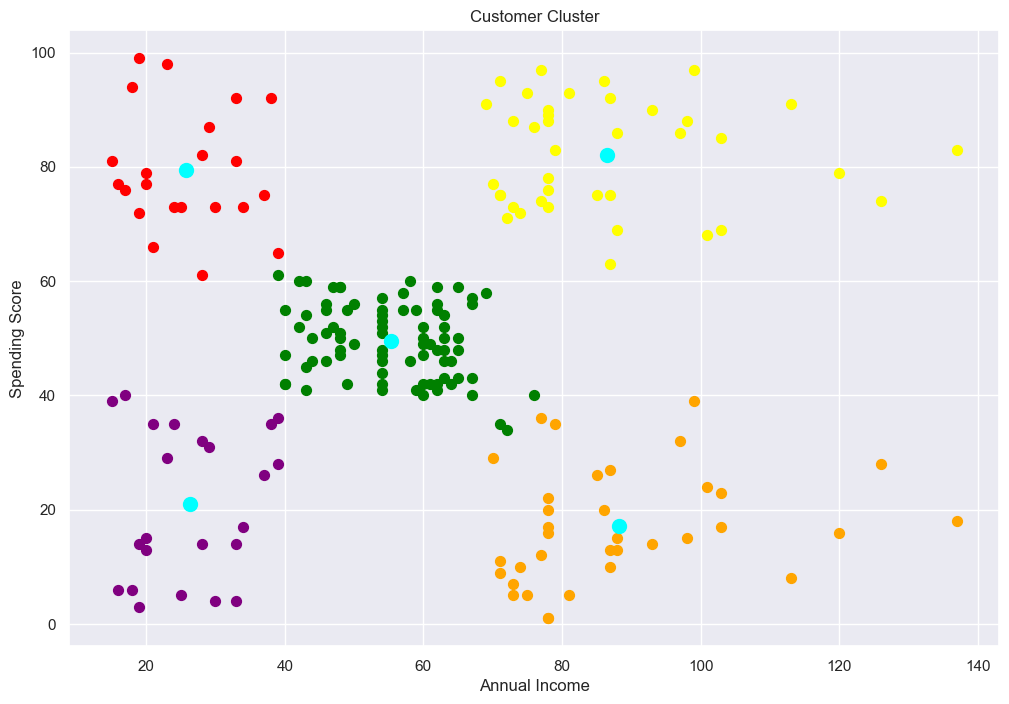

<Figure size 640x480 with 0 Axes>

In [22]:
#  Plotting all the clusters with their respective centroids.
plt.figure(figsize=(12,8))
plt.scatter(x[y==0, 0], x[y==0,1], s = 50, c='green', label = 'Cluster 1')
plt.scatter(x[y==1, 0], x[y==1,1], s = 50, c='yellow', label = 'Cluster 2')
plt.scatter(x[y==2, 0], x[y==2,1], s = 50, c='orange', label = 'Cluster 3')
plt.scatter(x[y==3, 0], x[y==3,1], s = 50, c='purple', label = 'Cluster 4')
plt.scatter(x[y==4, 0], x[y==4,1], s = 50, c='red', label = 'Cluster 5')

#  Plot the centroids.
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c = 'cyan', label = 'Centroids')
plt.title("Customer Cluster")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()
plt.savefig("Cluster.jpg")